<a href="https://colab.research.google.com/github/bernatm/ABDataChallengeExtension/blob/main/Exploratory_analysis_barcelona_wate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from collections import Counter
import seaborn as sns
import numpy as np
from matplotlib import pyplot
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df_domestic = pd.read_csv("/content/drive/MyDrive/FOURTH YEAR/TFG/Data AB/DOMESTIC/BARCELONA.csv")
df_domestic = df_domestic.sort_values(['ID_CONTADOR', 'FECHA'])
print("Number of rows:",len(df_domestic))
print("Number of water counters:",len(df_domestic["ID_CONTADOR"].unique()))
df_domestic.head()

Number of rows: 10126886
Number of water counters: 19116


,FECHA,USO,CONSUMO,ID_CONTADOR
176692,2019-11-19,DOMÈSTIC,100,0
176752,2019-11-28,DOMÈSTIC,4657,0
176872,2019-11-30,DOMÈSTIC,1279,0
168892,2019-12-03,DOMÈSTIC,76,0
168832,2019-12-06,DOMÈSTIC,1755,0


Boxplot original dataset


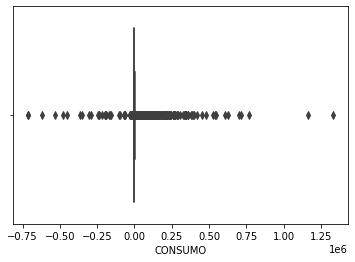

Boxplot after deleting outliers


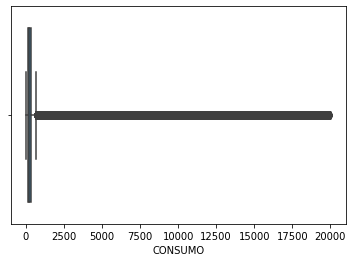

New number of rows: 8966770
New number of water counters: 16983


In [ ]:
print("Boxplot original dataset")
sns.boxplot(x=df_domestic["CONSUMO"])
plt.show()

outliers=df_domestic.loc[(df_domestic["CONSUMO"]>=20000)|(df_domestic["CONSUMO"]<0),"ID_CONTADOR"]
new_df_dom=df_domestic[df_domestic["ID_CONTADOR"].isin(outliers)==False]

print("Boxplot after deleting outliers")
sns.boxplot(x=new_df_dom["CONSUMO"])
plt.show()

print("New number of rows:",len(new_df_dom))
print("New number of water counters:",len(new_df_dom["ID_CONTADOR"].unique()))

Consumption over time for two different counters


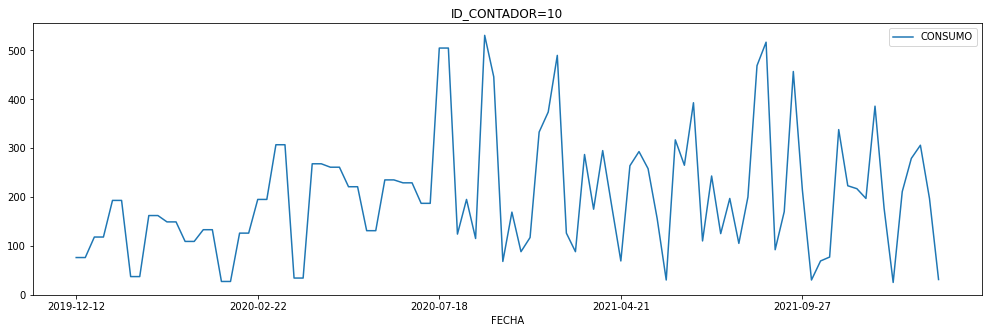

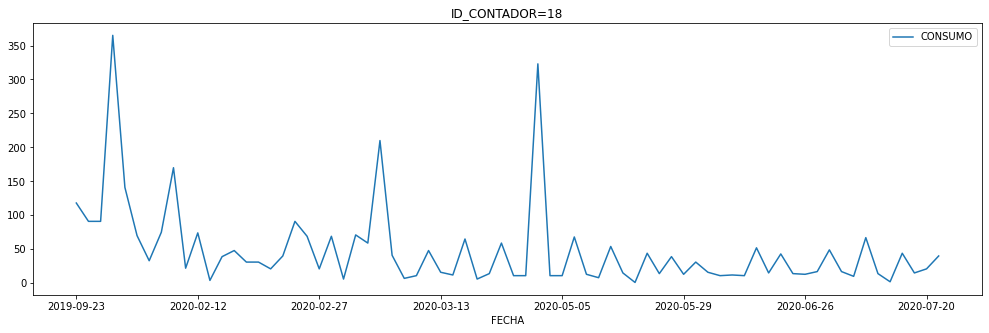

In [ ]:
print("Consumption over time for two different counters")
df_45=new_df_dom[new_df_dom["ID_CONTADOR"]==45]
df_45.plot("FECHA","CONSUMO",figsize=(17,5),title='ID_CONTADOR=10')
df_54=new_df_dom[new_df_dom["ID_CONTADOR"]==54]
df_54.plot("FECHA","CONSUMO",figsize=(17,5),title='ID_CONTADOR=18')

In [ ]:
#Scale consumption between 0 and 1 for each counter_id (there are houses that consume more water than others on average, for
#example, becasuse there are more people living)
a = new_df_dom.groupby('ID_CONTADOR')['CONSUMO']
min_, max_ = a.transform('min'), a.transform('max')
new_df_dom['CONSUMO_scaled'] = (new_df_dom['CONSUMO'] - min_) / (max_ - min_)

In [ ]:
new_df_dom.to_csv("/content/drive/MyDrive/FOURTH YEAR/TFG/Data AB/DOMESTIC/BARCELONA_limpio.csv")

Scaled consumption over time for two different counters


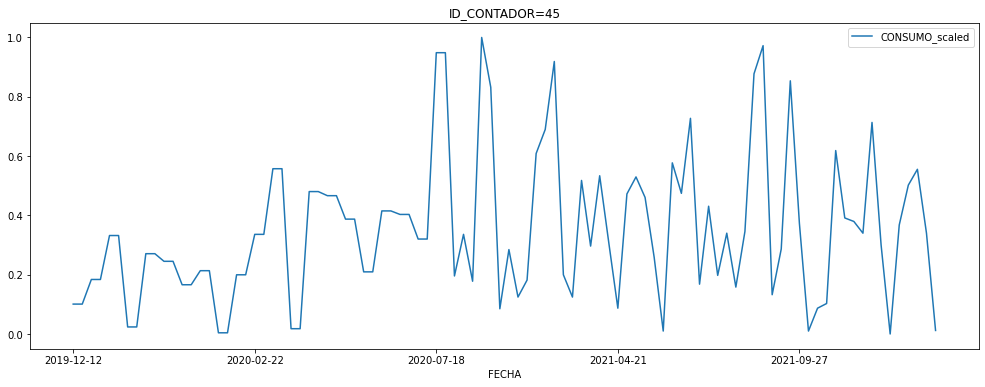

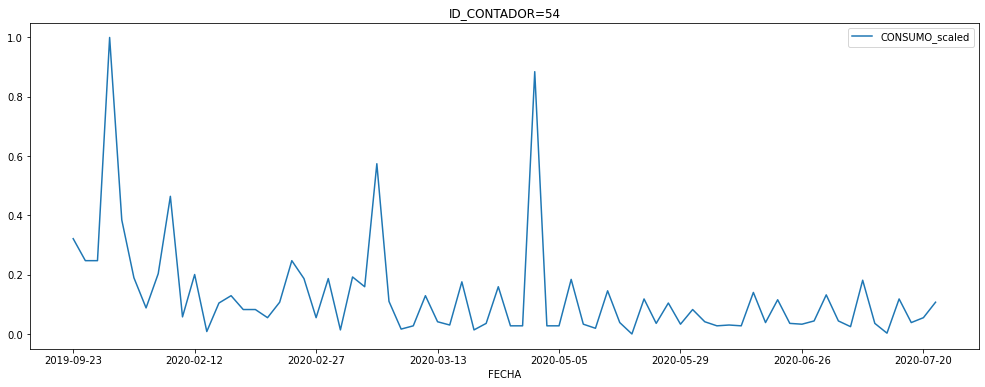

In [ ]:
print("Scaled consumption over time for two different counters")

df_45=new_df_dom[new_df_dom["ID_CONTADOR"]==45]
df_45.plot("FECHA","CONSUMO_scaled",figsize=(17,6),title='ID_CONTADOR=45')
plt.show()

df_54=new_df_dom[new_df_dom["ID_CONTADOR"]==54]
df_54.plot("FECHA","CONSUMO_scaled",figsize=(17,6),title='ID_CONTADOR=54')
plt.show()

In [ ]:
def lagged_series(series, lag):
    original = []
    lagged = []
    for i in range(len(series)):
        j = i - lag
        if j>=0 and j<len(series)-1:
            lagged.append(series[j])
            original.append(series[i])


    return original, lagged

In [ ]:
def correlation_without_nan(x,y):
    positions_to_remove = ~np.logical_or(np.isnan(x), np.isnan(y))

    x_without_nan = np.compress(positions_to_remove, x)
    y_without_nan = np.compress(positions_to_remove, y)
    return stats.pearsonr(x_without_nan,y_without_nan)[0]

def autocorrelation(series, lag):
    x,y = lagged_series(series, lag)

    return correlation_without_nan(x,y)

In [ ]:
def compute_autocorrelations(series, max_periods):
    autocorrelations = []
    for period in range(max_periods):
        corr = autocorrelation(series,period)
        autocorrelations.append(corr)
    return autocorrelations


In [ ]:
def plot_auto_correlations(correlations, xlabel="Lag (days)", ylabel="Autocorrelation"):
    # Figure
    plt.figure(figsize=(15,4))

    # Plot correlation
    plt.plot(range(len(correlations)), correlations, '-o')

    # Add xticks every 10 periods
    plt.xticks(np.arange(0, len(correlations), 10), rotation=90)

    # Add a horizontal line at zero
    plt.hlines(0, xmin=0, xmax=len(correlations))

    # Add labels
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

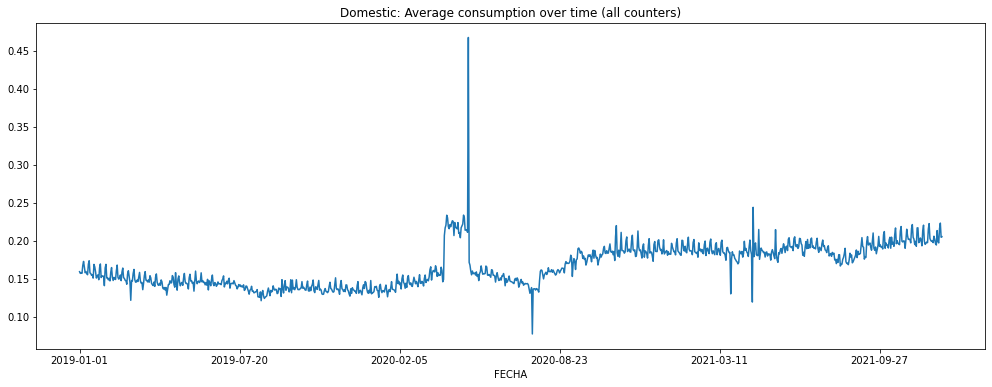

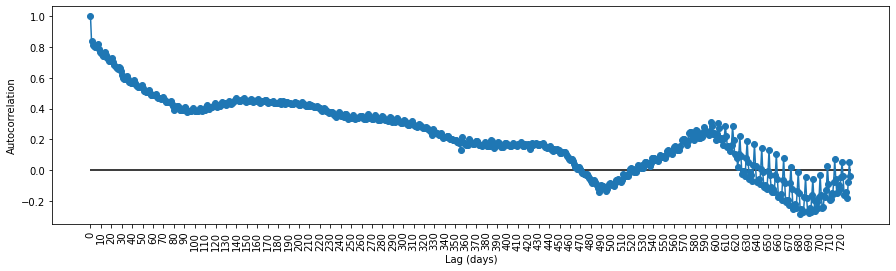

In [ ]:
df_date_consumption_dom=new_df_dom.groupby('FECHA')['CONSUMO_scaled'].mean()
df_date_consumption_dom.plot(figsize=(17,6),title="Domestic: Average consumption over time (all counters)")
plt.show()


max_periods=2*365
autocorrelations = compute_autocorrelations(df_date_consumption_dom,max_periods)
plot_auto_correlations(autocorrelations, ylabel="Autocorrelation")

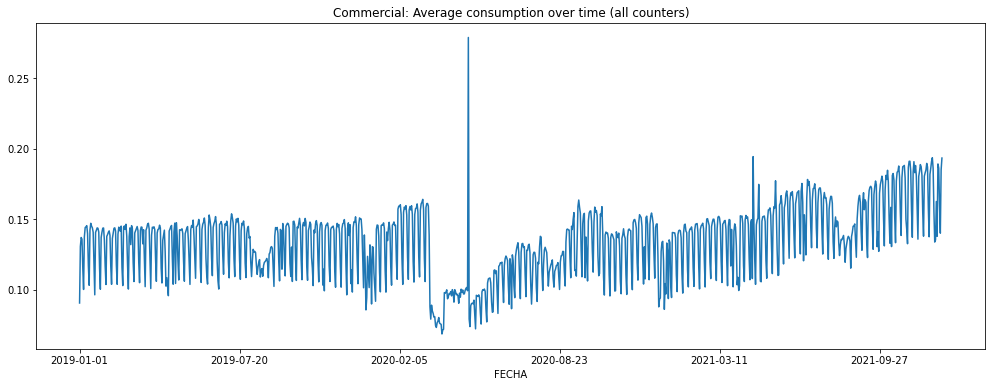

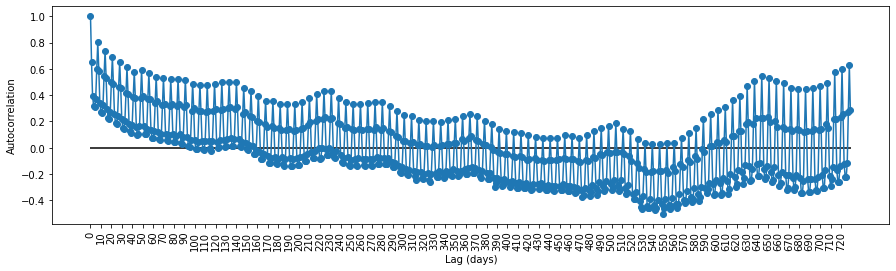

In [ ]:
df_comercial = pd.read_csv("/content/drive/MyDrive/FOURTH YEAR/TFG/Data AB/COMERCIAL/BARCELONA.csv")
df_comercial = df_comercial.sort_values(['ID_CONTADOR', 'FECHA'])
df_comercial.head()

outliers=df_comercial.loc[(df_comercial["CONSUMO"]>=20000)|(df_comercial["CONSUMO"]<0),"ID_CONTADOR"]
new_df_com=df_comercial[df_comercial["ID_CONTADOR"].isin(outliers)==False]

a = new_df_com.groupby('ID_CONTADOR')['CONSUMO']
min_, max_ = a.transform('min'), a.transform('max')
new_df_com['CONSUMO_scaled'] = (new_df_com['CONSUMO'] - min_) / (max_ - min_)

df_date_consumption_com=new_df_com.groupby('FECHA')['CONSUMO_scaled'].mean()
df_date_consumption_com.plot(figsize=(17,6),title="Commercial: Average consumption over time (all counters)")
plt.show()
max_periods=2*365
autocorrelations = compute_autocorrelations(df_date_consumption_com,max_periods)
plot_auto_correlations(autocorrelations, ylabel="Autocorrelation")

In [ ]:
new_df_com.to_csv("/content/drive/MyDrive/FOURTH YEAR/TFG/Data AB/COMERCIAL/BARCELONA_limpio.csv")

In [ ]:

df_industrial = pd.read_csv("/content/drive/MyDrive/FOURTH YEAR/TFG/Data AB/INDUSTRIAL/BARCELONA.csv")
df_industrial = df_industrial.sort_values(['ID_CONTADOR', 'FECHA'])
df_industrial.head()

outliers=df_industrial.loc[(df_industrial["CONSUMO"]>=20000)|(df_industrial["CONSUMO"]<0),"ID_CONTADOR"]
new_df_ind=df_industrial[df_industrial["ID_CONTADOR"].isin(outliers)==False]

a = new_df_ind.groupby('ID_CONTADOR')['CONSUMO']
min_, max_ = a.transform('min'), a.transform('max')
new_df_ind['CONSUMO_scaled'] = (new_df_ind['CONSUMO'] - min_) / (max_ - min_)

df_date_consumption_ind=new_df_ind.groupby('FECHA')['CONSUMO_scaled'].mean()
max_periods=2*365
autocorrelations = compute_autocorrelations(df_date_consumption_ind,max_periods)


In [ ]:
new_df_ind.to_csv("/content/drive/MyDrive/FOURTH YEAR/TFG/Data AB/INDUSTRIAL/BARCELONA_limpio.csv")

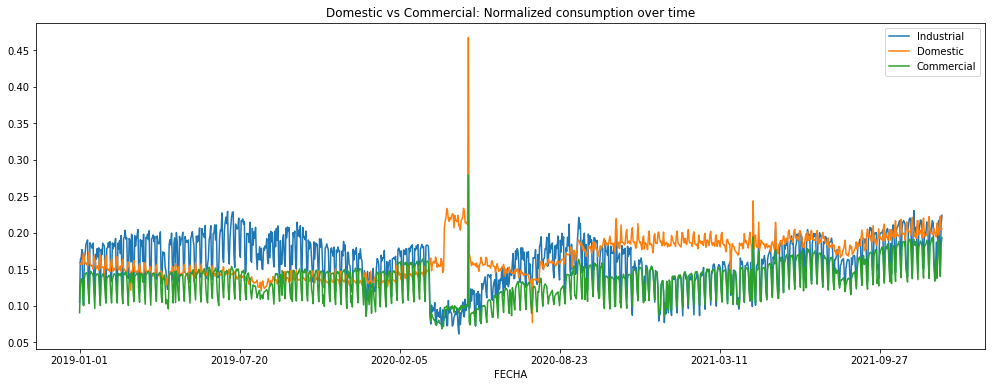

In [ ]:
df_date_consumption_ind.plot(figsize=(17,6),label='Industrial')
df_date_consumption_dom.plot(figsize=(17,6),label='Domestic')
df_date_consumption_com.plot(figsize=(17,6),label='Commercial')
plt.title("Domestic vs Commercial: Normalized consumption over time")
plt.legend()
plt.show()

In [ ]:
df_date_consumption_dom=df_date_consumption_dom.to_frame()
df_date_consumption_com=df_date_consumption_com.to_frame()
df_date_consumption_ind=df_date_consumption_ind.to_frame()

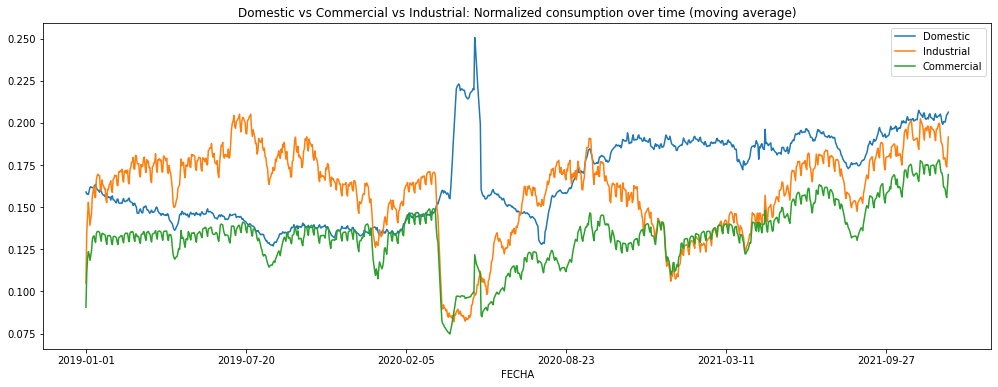

In [ ]:
def moving_average(df, window_size):

    smoothed = pd.DataFrame(columns=df.columns)

    for i in range(len(df)):
        if i<window_size:
            rows = df.iloc[0:i+1]
            average = rows.mean()
        else:
            seven_rows = df.iloc[i-window_size:i+1]
            average = seven_rows.mean()
        smoothed.loc[i]=average

    smoothed.set_index(df.index, inplace=True)

    return smoothed

df_date_consumption_dom_smooth=moving_average(df_date_consumption_dom, 7)
df_date_consumption_com_smooth=moving_average(df_date_consumption_com, 7)
df_date_consumption_ind_smooth=moving_average(df_date_consumption_ind, 7)

df_date_consumption_dom_smooth['CONSUMO_scaled'].plot(figsize=(17,6),label='Domestic')
df_date_consumption_ind_smooth['CONSUMO_scaled'].plot(figsize=(17,6),label='Industrial')
df_date_consumption_com_smooth['CONSUMO_scaled'].plot(figsize=(17,6),label='Commercial')
plt.title("Domestic vs Commercial vs Industrial: Normalized consumption over time (moving average)")
plt.legend()
plt.show()

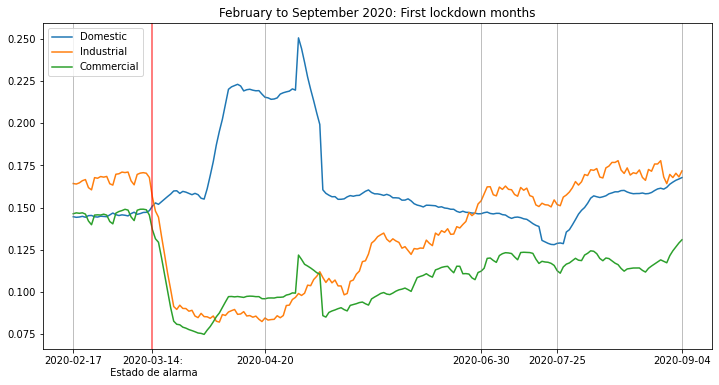

In [ ]:
plt.figure(figsize=(12,6))
plt.title("February to September 2020: First lockdown months")

plt.plot(df_date_consumption_dom_smooth.loc['2020-02-17':'2020-09-04','CONSUMO_scaled'],label='Domestic')
plt.plot(df_date_consumption_ind_smooth.loc['2020-02-17':'2020-09-04','CONSUMO_scaled'],label='Industrial')
plt.plot(df_date_consumption_com_smooth.loc['2020-02-17':'2020-09-04','CONSUMO_scaled'],label='Commercial')

plt.legend(loc='upper left')
labels = ['2020-02-17','2020-03-14:\n Estado de alarma','2020-04-20','2020-06-30','2020-07-25','2020-09-04']
plt.xticks(['2020-02-17','2020-03-14','2020-04-20','2020-06-30','2020-07-25','2020-09-04'],labels=labels)


for tick in plt.xticks()[0]:
    if tick==26:
        plt.axvline(tick, color='red', linestyle='-', linewidth=2, alpha=.5)
    else:
        plt.axvline(tick, color='gray', linestyle='-', linewidth=1, alpha=.5)
plt.show()